In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [24]:
data = pd.read_csv("hareysa_data.csv")

In [26]:
data.head(2)

,place,date,climate/rainfall,climate/vegetation_cover_(ndvi),climate/price_of_water,population_movement/displacement_(arrivals),nutrition/new_admissions_(gam),market/maize_prices,market/sorghum_prices,market/local_goat_prices,market/wage_labor,market/tot_(wage_to_cereals),market/tot_(goat_to_cereals),market/red_rice_prices,market/cost_of_minimum_basket_(cmb),Displacements
0,woqooyi_galbeed/hargeysa,Jan-2016,0.17,0.0,11000.0,260.0,457.0,4000.0,3500.0,365000.0,50000.0,10.0,73.0,5000.0,1021371.25,273
1,woqooyi_galbeed/hargeysa,Feb-2016,0.13,0.0,12000.0,260.0,597.0,4000.0,3500.0,272000.0,50000.0,10.0,54.0,5000.0,1045462.50,269


In [27]:
data.shape

(43, 16)

In [41]:
data['nutrition/new_admissions_(gam)'].fillna(value=data['nutrition/new_admissions_(gam)'].mean(), inplace=True)

In [42]:
data['date'].unique()

array(['Jan-2016', 'Feb-2016', 'Mar-2016', 'Apr-2016', 'May-2016',
       'Jun-2016', 'Jul-2016', 'Aug-2016', 'Sep-2016', 'Oct-2016',
       'Nov-2016', 'Dec-2016', 'Jan-2017', 'Feb-2017', 'Mar-2017',
       'Apr-2017', 'May-2017', 'Jun-2017', 'Jul-2017', 'Aug-2017',
       'Sep-2017', 'Oct-2017', 'Nov-2017', 'Dec-2017', 'Jan-2018',
       'Feb-2018', 'Mar-2018', 'Apr-2018', 'May-2018', 'Jun-2018',
       'Jul-2018', 'Aug-2018', 'Sep-2018', 'Oct-2018', 'Nov-2018',
       'Dec-2018', 'Jan-2019', 'Feb-2019', 'Mar-2019', 'Apr-2019',
       'May-2019', 'Jun-2019', 'Jul-2019'], dtype=object)

AxesSubplot(0.125,0.125;0.775x0.755)


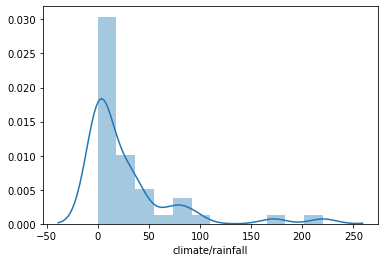

AxesSubplot(0.125,0.125;0.775x0.755)


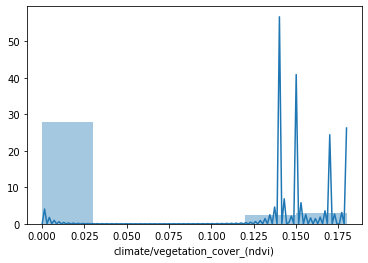

AxesSubplot(0.125,0.125;0.775x0.755)


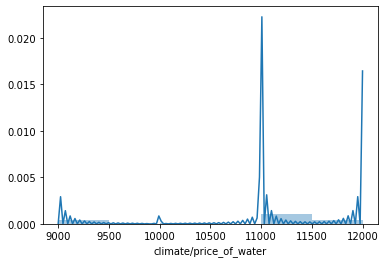

AxesSubplot(0.125,0.125;0.775x0.755)


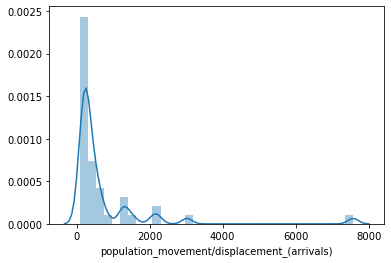

AxesSubplot(0.125,0.125;0.775x0.755)


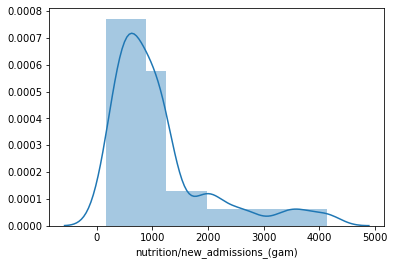

AxesSubplot(0.125,0.125;0.775x0.755)


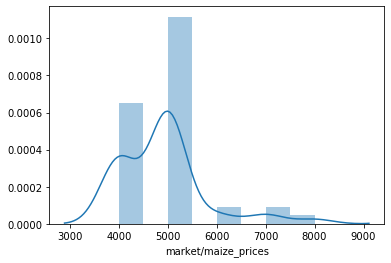

AxesSubplot(0.125,0.125;0.775x0.755)


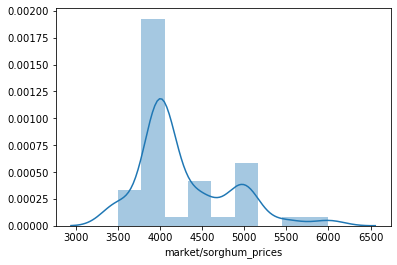

AxesSubplot(0.125,0.125;0.775x0.755)


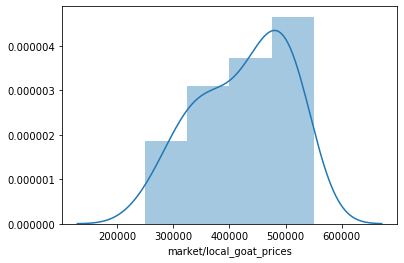

AxesSubplot(0.125,0.125;0.775x0.755)


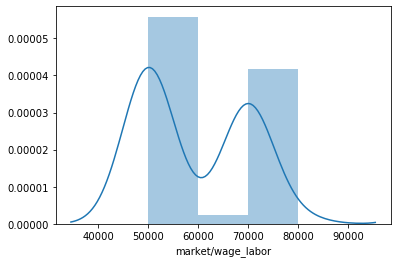

AxesSubplot(0.125,0.125;0.775x0.755)


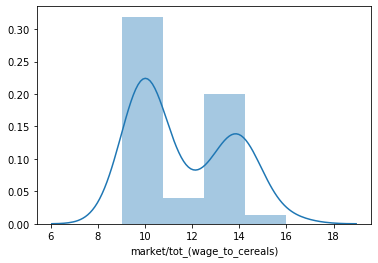

AxesSubplot(0.125,0.125;0.775x0.755)


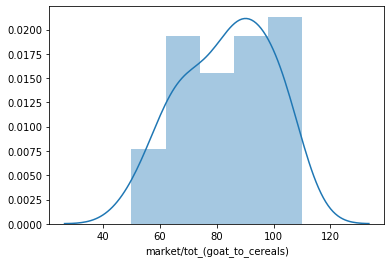

AxesSubplot(0.125,0.125;0.775x0.755)


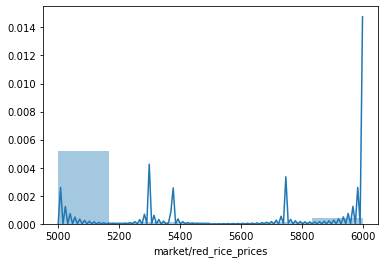

AxesSubplot(0.125,0.125;0.775x0.755)


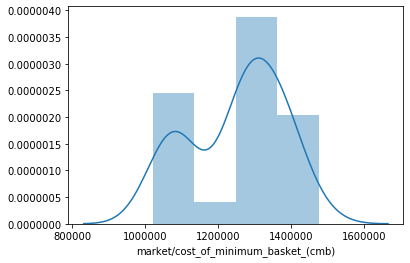

AxesSubplot(0.125,0.125;0.775x0.755)


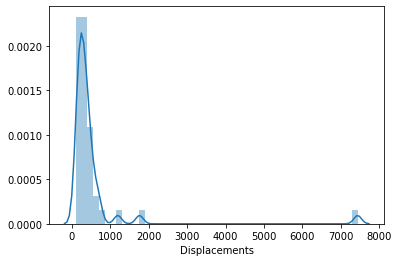

In [47]:
for col in data.columns[2:]:
    print(sns.distplot(data[col]))
    plt.show()

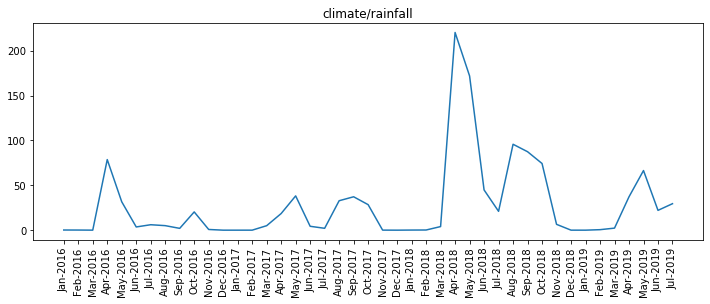

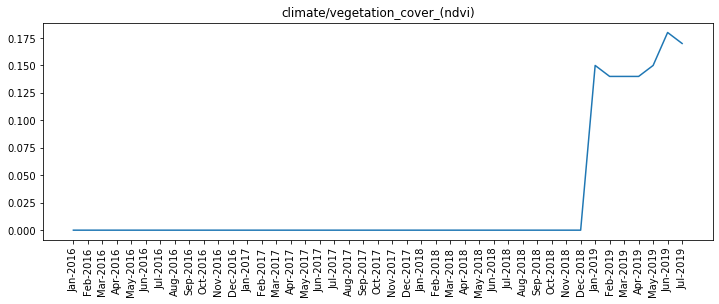

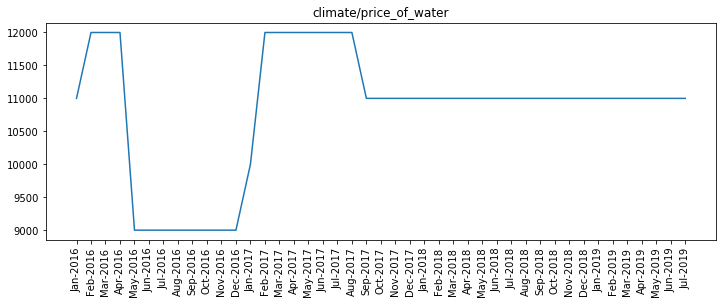

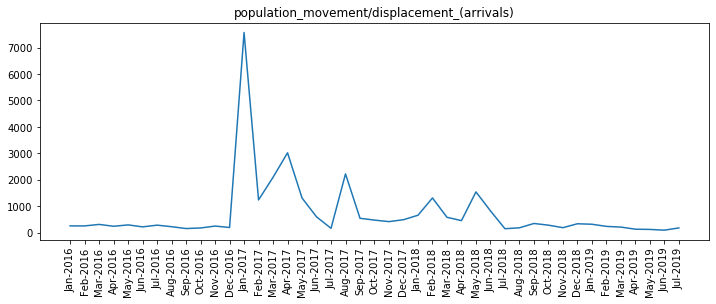

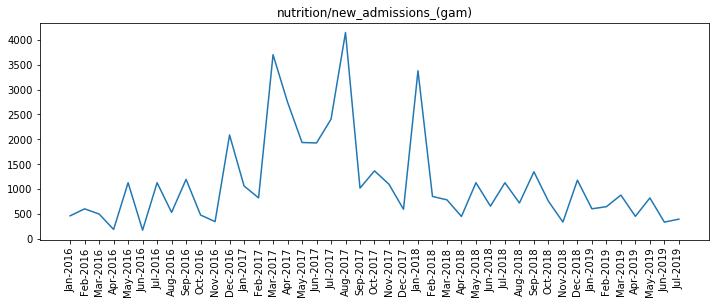

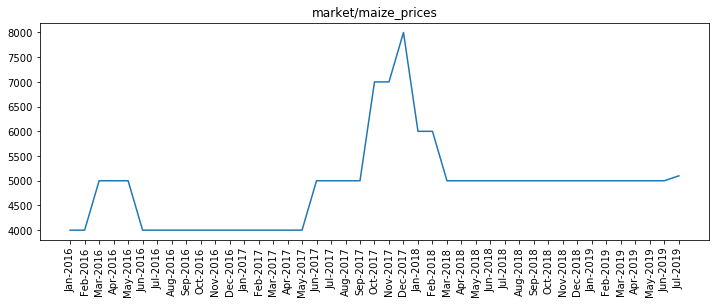

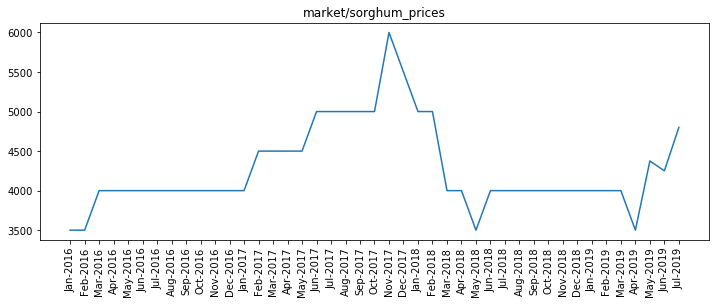

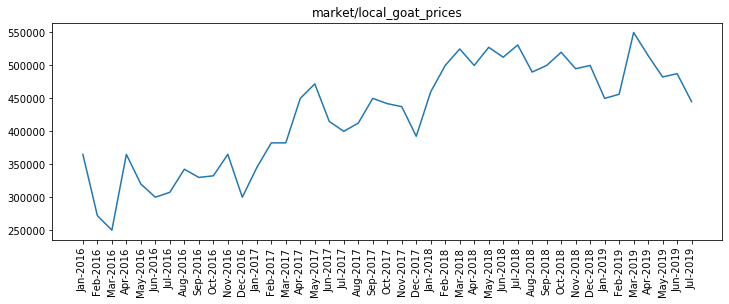

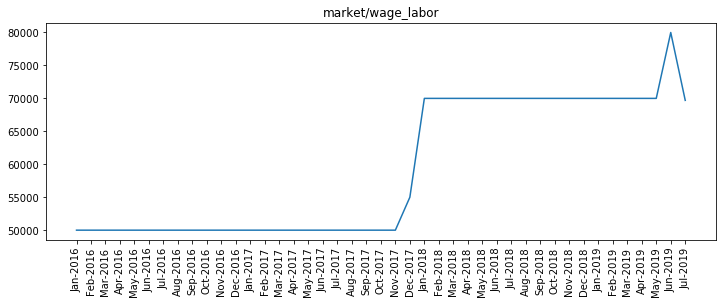

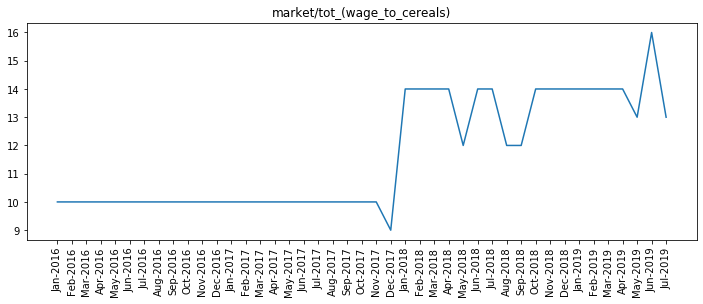

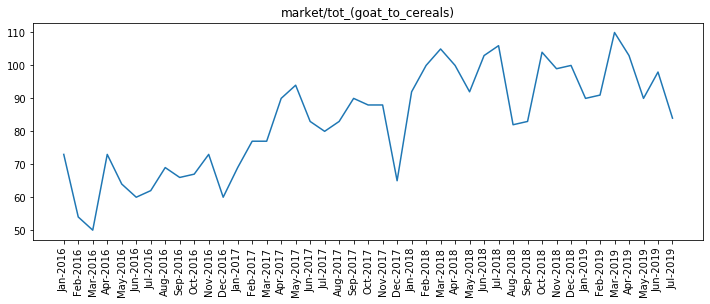

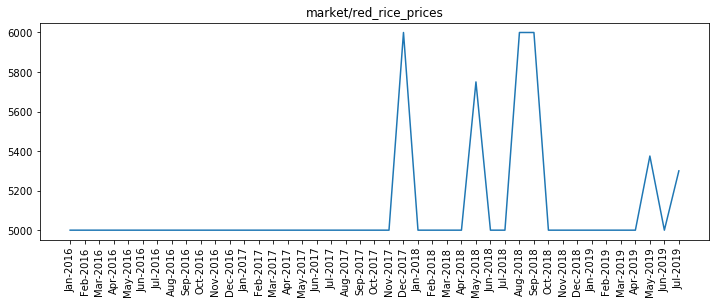

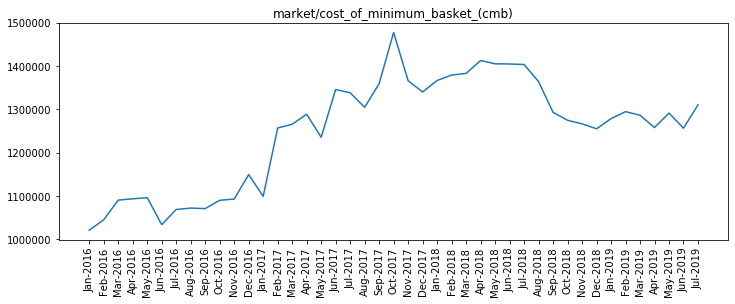

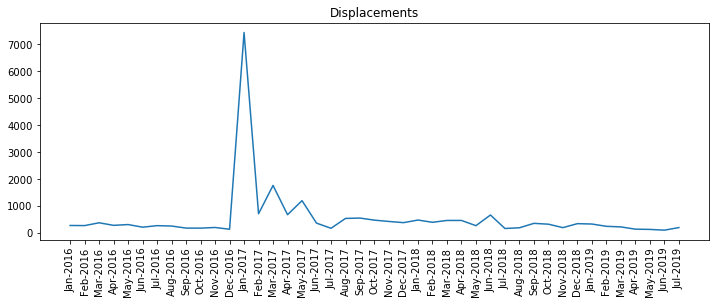

In [58]:
for col in data.columns[2:]:
    plt.figure(figsize=(12,4))
    plt.plot(data['date'],data[col])
    plt.xticks(rotation='vertical')
    plt.title(col)
    plt.show()

In [63]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [83]:
new_disp = list(data['Displacements'].iloc[1:].values)

In [84]:
new_disp.append(np.nan)

In [96]:
rnn_data = pd.concat((data, pd.DataFrame(new_disp, columns=['y'])),axis=1)

In [97]:
rnn_data.head()

,place,date,climate/rainfall,climate/vegetation_cover_(ndvi),climate/price_of_water,population_movement/displacement_(arrivals),nutrition/new_admissions_(gam),market/maize_prices,market/sorghum_prices,market/local_goat_prices,market/wage_labor,market/tot_(wage_to_cereals),market/tot_(goat_to_cereals),market/red_rice_prices,market/cost_of_minimum_basket_(cmb),Displacements,y
0,woqooyi_galbeed/hargeysa,Jan-2016,0.17,0.0,11000.0,260.0,457.00000,4000.0,3500.0,365000.0,50000.0,10.0,73.0,5000.0,1021371.25,273,269.0
1,woqooyi_galbeed/hargeysa,Feb-2016,0.13,0.0,12000.0,260.0,597.00000,4000.0,3500.0,272000.0,50000.0,10.0,54.0,5000.0,1045462.50,269,373.0
2,woqooyi_galbeed/hargeysa,Mar-2016,0.02,0.0,12000.0,316.0,493.00000,5000.0,4000.0,250000.0,50000.0,10.0,50.0,5000.0,1090698.75,373,278.0
3,woqooyi_galbeed/hargeysa,Apr-2016,78.67,0.0,12000.0,246.0,183.00000,5000.0,4000.0,365000.0,50000.0,10.0,73.0,5000.0,1093725.00,278,307.0
4,woqooyi_galbeed/hargeysa,May-2016,31.62,0.0,9000.0,298.0,1123.25641,5000.0,4000.0,320000.0,50000.0,10.0,64.0,5000.0,1096237.50,307,210.0


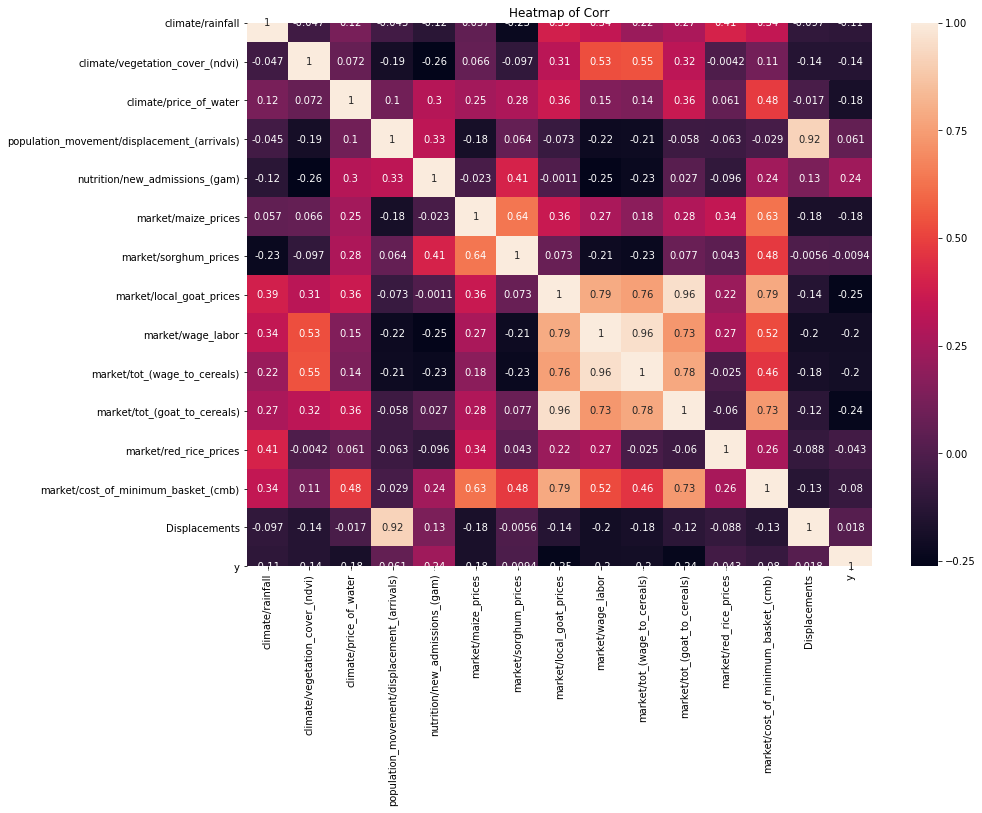

In [110]:
plt.figure(figsize=(14,10))
sns.heatmap(rnn_data.iloc[:,2:].corr(),annot=True)
plt.title("Heatmap of Corr")
plt.show()

In [113]:
rnn_data.shape

(43, 17)

In [118]:
train = rnn_data.iloc[:30,2:].values
test = rnn_data.iloc[30:,2:].values

In [119]:
train.shape

(30, 15)

In [120]:
test.shape

(13, 15)

In [143]:
X_train = train[:,:-1]
X_test = test[:,:-1]
y_train = train[:,-1]
y_test = test[:,-1]

In [144]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30, 14)
(13, 14)
(30,)
(13,)


In [128]:
import tensorflow as tf
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [137]:
print(X_train.shape)
print(X_test.shape)

(30, 1, 14)
(13, 1, 14)


In [149]:
X_train.shape[0]

30

In [157]:
# design network
model = Sequential()
# model.add(LSTM(50, input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(100,input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)
# plot history
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()

Train on 30 samples, validate on 13 samples
Epoch 1/50
 - 1s - loss: 197184.5312 - val_loss: nan
Epoch 2/50
 - 0s - loss: 184404.0781 - val_loss: nan
Epoch 3/50
 - 0s - loss: 169698.9062 - val_loss: nan
Epoch 4/50
 - 0s - loss: 152618.8906 - val_loss: nan
Epoch 5/50
 - 0s - loss: 136653.7344 - val_loss: nan
Epoch 6/50
 - 0s - loss: 119710.8750 - val_loss: nan
Epoch 7/50
 - 0s - loss: 102830.3359 - val_loss: nan
Epoch 8/50
 - 0s - loss: 86024.3359 - val_loss: nan
Epoch 9/50
 - 0s - loss: 69295.7969 - val_loss: nan
Epoch 10/50
 - 0s - loss: 52654.9453 - val_loss: nan
Epoch 11/50
 - 0s - loss: 36079.3516 - val_loss: nan
Epoch 12/50
 - 0s - loss: 19704.4082 - val_loss: nan
Epoch 13/50
 - 0s - loss: 6809.3770 - val_loss: nan
Epoch 14/50
 - 0s - loss: 11926.9951 - val_loss: nan
Epoch 15/50
 - 0s - loss: 22607.1777 - val_loss: nan
Epoch 16/50
 - 0s - loss: 30180.3770 - val_loss: nan
Epoch 17/50
 - 0s - loss: 34744.8750 - val_loss: nan
Epoch 18/50
 - 0s - loss: 36781.9492 - val_loss: nan
Epoch